In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

pd.set_option('display.max_rows', 50) # показывать больше строк
pd.set_option('display.max_columns', 50) # показывать больше колонок

cacao = pd.read_csv('cacao_flavors.xls')
display(cacao)

,Bar id,Company \n(Maker-if known),Specific Bean Origin\nor Bar Name,REF,Review\nDate,Cocoa\nPercent,Company\nLocation,Rating,Bean\nType,Broad Bean\nOrigin
0,1,A. Morin,Agua Grande,1876,2016,63%,France,11.50,,Sao Tome
1,2,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,3,A. Morin,Atsane,1676,2015,670%,France,3.00,,Togo
3,4,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,5,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru
...,...,...,...,...,...,...,...,...,...,...
1790,1791,Zotter,Peru,647,2011,70%,Austria,3.75,,Peru
1791,1792,Zotter,Congo,749,2011,65%,Austria,3.00,Forastero,Congo
1792,1793,Zotter,Kerala State,749,2011,65%,Austria,3.50,Forastero,India
1793,1794,Zotter,Kerala State,781,2011,62%,Austria,3.25,,India


In [3]:
# переименовываем столбцы для удобства
cacao.columns = ['bar_id', 'company','specific_origin','ref',
                'review','cocoa_percent','company_location','rating','bean_type','broad_origin']
cacao

,bar_id,company,specific_origin,ref,review,cocoa_percent,company_location,rating,bean_type,broad_origin
0,1,A. Morin,Agua Grande,1876,2016,63%,France,11.50,,Sao Tome
1,2,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,3,A. Morin,Atsane,1676,2015,670%,France,3.00,,Togo
3,4,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,5,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru
...,...,...,...,...,...,...,...,...,...,...
1790,1791,Zotter,Peru,647,2011,70%,Austria,3.75,,Peru
1791,1792,Zotter,Congo,749,2011,65%,Austria,3.00,Forastero,Congo
1792,1793,Zotter,Kerala State,749,2011,65%,Austria,3.50,Forastero,India
1793,1794,Zotter,Kerala State,781,2011,62%,Austria,3.25,,India


1795


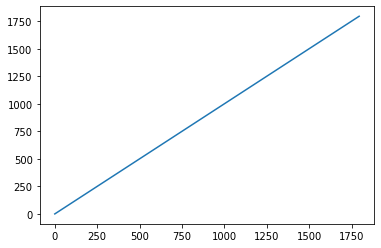

In [4]:
# рассмотрим все 10 столбцов по отдельности
print(cacao.bar_id.nunique())
plt.plot(cacao.bar_id)
# Тут все просто: это столбец индексов батончиков, количество уникальных значений соответствует 
#     количеству строк. 
#     Вряд ли он пригодится для дальнейшего анализа, удалим его.


In [5]:
# Тут все просто: это столбец индексов батончиков, количество уникальных значений соответствует 
#     количеству строк. 
#     Вряд ли он пригодится для дальнейшего анализа, удалим его.
cacao.drop(['bar_id'], inplace = True, axis = 1)
cacao

,company,specific_origin,ref,review,cocoa_percent,company_location,rating,bean_type,broad_origin
0,A. Morin,Agua Grande,1876,2016,63%,France,11.50,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,670%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru
...,...,...,...,...,...,...,...,...,...
1790,Zotter,Peru,647,2011,70%,Austria,3.75,,Peru
1791,Zotter,Congo,749,2011,65%,Austria,3.00,Forastero,Congo
1792,Zotter,Kerala State,749,2011,65%,Austria,3.50,Forastero,India
1793,Zotter,Kerala State,781,2011,62%,Austria,3.25,,India


In [6]:
# Посмотрим, сколько компаний содержит наш датасет.
pd.DataFrame(cacao.company.value_counts())

,company
,99
Soma,45
Bonnat,26
Fresco,26
Pralus,25
...,...
Nanea,1
Cacao Market,1
Cloudforest,1
Britarev,1


In [7]:
len(cacao.company.unique())

408

In [8]:
# Попробуем отфильтровать лишние данные и выведем только те компании, 
# у которых в рейтинге больше 10 продуктов.
cacao.company = cacao.company.apply(lambda x: None if x.strip()=='' else x)

In [9]:
display(pd.DataFrame(cacao.company.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:"#Число 10 взято для ориентира, можно брать другое
      , (cacao.company.value_counts()>10).sum())
cacao.loc[:, ['company']].info()

,company
Soma,45
Fresco,26
Bonnat,26
Pralus,25
Domori,22
...,...
Green & Black's (ICAM),1
Christopher Morel (Felchlin),1
Rain Republic,1
Garden Island,1


Значений, встретившихся в столбце более 10 раз: 30
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   company  1696 non-null   object
dtypes: object(1)
memory usage: 14.1+ KB


In [10]:
# Давайте сделаем то же самое для столбца с местом происхождения какао-бобов. 
cacao.specific_origin.value_counts()

# Сколько значений, встретившихся в столбце более 10 раз?
# display(pd.DataFrame(cacao.specific_origin))
spec = pd.DataFrame(cacao.specific_origin)
spec = pd.DataFrame(spec.specific_origin.value_counts()>10)
spec= spec[spec.specific_origin == True]
spec.specific_origin.value_counts()-1

True    15
Name: specific_origin, dtype: int64

count    1795.000000
mean     1035.904735
std       552.886365
min         5.000000
25%       576.000000
50%      1069.000000
75%      1502.000000
max      1952.000000
Name: ref, dtype: float64

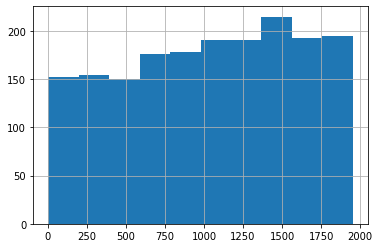

In [11]:
# ref столбец чиловой и без пропусков. Посмотрим его распределение.
cacao.ref.hist()
cacao.ref.describe()
# Как видно, у этого признака нормальное распределение, выбросов нет. 
# Заметен тренд на возрастание количества отзывов со временем (так как REF обозначает время внесения отзыва в базу). 
# Интересно, почему так происходит?

count    1795.000000
mean     2012.325348
std         2.927210
min      2006.000000
25%      2010.000000
50%      2013.000000
75%      2015.000000
max      2017.000000
Name: review, dtype: float64

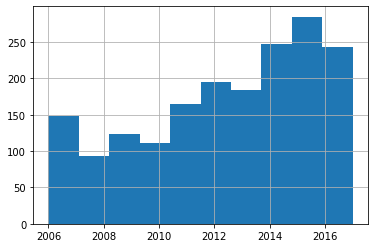

In [12]:
# review_date
# Этот столбец также числовой и у него также нет пропусков. 
# Как ведет себя распределение этого признака?
cacao.review.hist()
cacao.review.describe()
# Здесь также заметен тренд на увеличение ревью со временем.

In [13]:
# cocoa_percent
# Посмотрим на данные в столбце:
cacao.cocoa_percent
# Трансформируем столбец:
cacao.cocoa_percent = cacao.cocoa_percent.apply(lambda x: float(x.replace('%','')))


count    1795.000000
mean       75.932312
std        44.475981
min        42.000000
25%        70.000000
50%        70.000000
75%        75.000000
max       682.000000
Name: cocoa_percent, dtype: float64

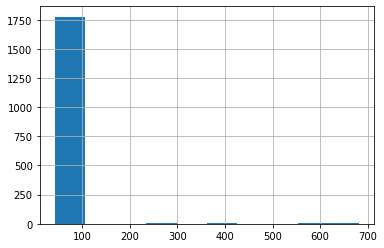

In [14]:
cacao.cocoa_percent.hist()
cacao.cocoa_percent.describe()

25-й перцентиль: 70.0, 75-й перцентиль: 75.0, IQR: 5.0,  Границы выбросов: [62.5, 82.5].


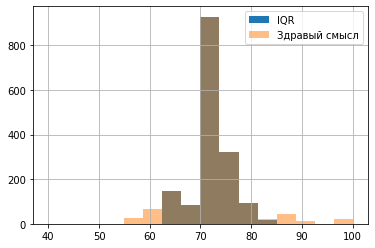

In [15]:
# Самый простой способ отфильтровать выбросы — воспользоваться формулой интерквартильного 
# расстояния (межквартильного размаха). 
# Выбросом считаются такие значения, которые лежат вне рамок
median = cacao.cocoa_percent.median()
IQR = cacao.cocoa_percent.quantile(0.75) - cacao.cocoa_percent.quantile(0.25)
perc25 = cacao.cocoa_percent.quantile(0.25)
perc75 = cacao.cocoa_percent.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75)
      , "IQR: {}, ".format(IQR),"Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
cacao.cocoa_percent.loc[cacao.cocoa_percent.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins = 16
                                                                                              , range = (40, 100), 
                                                                                             label = 'IQR')
cacao.cocoa_percent.loc[cacao.cocoa_percent <= 100].hist(alpha = 0.5, bins = 16, range = (40, 100),
                                                        label = 'Здравый смысл')
plt.legend();

In [16]:
# Однако такой способ отбора выбросов работает не всегда. Когда мы знаем потенциальные 
# характеристики распределения, лучше отобрать их, пользуясь здравым смыслом. 
# Как видно, формула выбросов в нашем случае помечает как выбросы слишком много потенциально 
# реальных значений, поэтому воспользуемся здравым смыслом. 
# Очевидно, что при сборе данных произошла ошибка. К сожалению, такое случается нередко.
cacao = cacao.loc[cacao.cocoa_percent <= 100]

In [17]:
# company_location
# Посмотрим на данные в столбце страны-производителя:
display(cacao.company_location)
len(cacao.company_location.unique())
print((cacao.company_location.value_counts()>10).sum())

cacao.loc[:,['company_location']].info()


0        France
1        France
3        France
4        France
5        France
         ...   
1790    Austria
1791    Austria
1792    Austria
1793    Austria
1794    Austria
Name: company_location, Length: 1776, dtype: object

22
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1776 entries, 0 to 1794
Data columns (total 1 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   company_location  1776 non-null   object
dtypes: object(1)
memory usage: 27.8+ KB


count    1776.000000
mean        3.425816
std         1.759007
min         1.000000
25%         3.000000
50%         3.250000
75%         3.500000
max        19.750000
Name: rating, dtype: float64

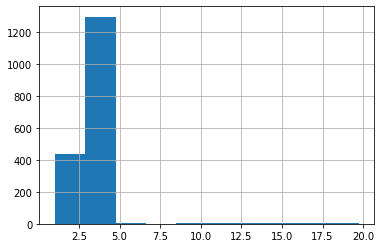

In [20]:
# rating
# Rating — важный столбец, так как именно рейтинг шоколада будет учиться предсказывать 
# будущая модель.

cacao.rating
cacao.rating.hist()
cacao.rating.describe()

25 перцентиль: 3.0 75 перцентиль:3.5 IQR:0.5 Граница выбросов[2.25,4.25]


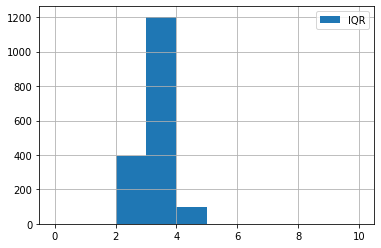

In [45]:
#проверим rating на выбросы
import numpy as np
median = cacao.rating.median()
IQR = cacao.rating.quantile(0.75) - cacao.rating.quantile(0.25)

perc25 = cacao.rating.quantile(0.25)
perc75 = cacao.rating.quantile(0.75)

print('25 перцентиль: {}'.format(perc25),'75 перцентиль:{}'.format(perc75),'IQR:{}'.format(IQR),
     'Граница выбросов[{},{}]'.format((perc25-1.5*IQR),(perc75+1.5*IQR)))
cacao.rating.loc[cacao.rating.between(perc25-1.5*IQR, perc75+1.5*IQR)].hist(bins=10, 
                                                                            range = (0,10), 
                                                                            label = 'IQR')
plt.legend()

# Этот способ позволил нам отобрать экстремально низкие и экстремально высокие оценки. 
# Отфильтруем данные:
cacao = cacao.loc[cacao.rating.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)]

,company,specific_origin,ref,review,cocoa_percent,company_location,rating,bean_type,broad_origin
1,A. Morin,Kpime,1676,2015,70.0,France,2.75,,Togo
3,A. Morin,Akata,1680,2015,70.0,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70.0,France,3.50,,Peru
5,A. Morin,Carenero,1315,2014,70.0,France,2.75,Criollo,Venezuela
6,A. Morin,Cuba,1315,2014,70.0,France,3.50,,Cuba
...,...,...,...,...,...,...,...,...,...
1790,Zotter,Peru,647,2011,70.0,Austria,3.75,,Peru
1791,Zotter,Congo,749,2011,65.0,Austria,3.00,Forastero,Congo
1792,Zotter,Kerala State,749,2011,65.0,Austria,3.50,Forastero,India
1793,Zotter,Kerala State,781,2011,62.0,Austria,3.25,,India


In [72]:
# bean_type
# Сразу заменим пропуски на None:

cacao.bean_type = cacao.bean_type.astype(str).apply(lambda x: None if x.strip()=='' else x)
display(pd.DataFrame(cacao.bean_type.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:", 
      (cacao.bean_type.value_counts()>10).sum()-1)
print('Уникальных значений:',cacao.bean_type.nunique()-1)
pd.DataFrame(cacao.bean_type).info()

,bean_type
None,829
Trinitario,401
Criollo,147
Forastero,81
Forastero (Nacional),50
"Criollo, Trinitario",37
Blend,36
Forastero (Arriba),30
Criollo (Porcelana),10
"Trinitario, Criollo",9


Значений, встретившихся в столбце более 10 раз: 7
Уникальных значений: 41
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1690 entries, 1 to 1794
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   bean_type  1690 non-null   object
dtypes: object(1)
memory usage: 26.4+ KB


In [73]:
# Мы видим, что есть строка со значением nan, надо заменить её на None для удобства. 
# Также мы видим, что многие типы бобов указаны с пояснением, например "Criollo (Ocumare 67)", 
# такие значения стоит привести к общему виду.
cacao.bean_type = cacao.bean_type.apply(lambda x: None if pd.isnull(x) else None if x=='nan'
                                       else x if'(' not in x else x[:x.find('(')].strip())

In [77]:
cacao.bean_type.value_counts()
print("Значений, встретившихся в столбце более 10 раз:", 
      (cacao.bean_type.value_counts()>10).sum()-1)
print('Уникальных значений:',cacao.bean_type.nunique()-1)
pd.DataFrame(cacao.bean_type).info()

Значений, встретившихся в столбце более 10 раз: 5
Уникальных значений: 21
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1690 entries, 1 to 1794
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   bean_type  1689 non-null   object
dtypes: object(1)
memory usage: 26.4+ KB


In [87]:
# broad_origin
#обработать самостоятельно
cacao.broad_origin = cacao.broad_origin.astype(str).apply(lambda x: None if x.strip()=='' else x)
print('Встречаются более 10 раз:', (cacao.broad_origin.value_counts()>10).sum()-1)

Встречаются более 10 раз: 25


In [104]:
# Обратим внимание, что в столбце много повторяющихся значений с различным написанием. 
# Давайте это исправим, написав дополнительную функцию:
def fix_countries(x):
    if pd.isnull(x):
        return x
    if x == 'nan':
        return None
    x = x.replace(' ', '')
    x = x.replace('/', ',') # Venezuela/ Ghana
    x = x.replace('&', ',')
    if '(' in x:
        x = x[:x.find('(')] #Peru(SMartin,Pangoa,nacional)
    x = x.replace('Guat.', 'Guatemala')
    
    if 'Ven' in x and 'Venezuela' not in x:
        x = x.replace('Venez', 'Venezuela') #Venez,Africa,Brasil,Peru,Mex
        x = x.replace('Ven,', 'Venezuela,') #Ven, Trinidad, Ecuador
        x = x.replace('Ven.', 'Venezuela') #Ven., Trinidad, Mad.
        if 'Ven' in x and 'Venezuela' not in x:
            x = x.replace('Ven', 'Venezuela')
        
    x = x.replace('Dom.Rep.', 'DomincanRepublic')
    x = x.replace('DR', 'DomincanRepublic')
    x = x.replace('Dom.Rep', 'DomincanRepublic')
    x = x.replace('D.R.', 'DomincanRepublic')
    x = x.replace('DominicanRep.', 'DomincanRepublic')
    x = x.replace('Domin.Rep', 'DomincanRepublic')
    x = x.replace('Domin.Re', 'DomincanRepublic')
    
    if 'Jam' in x and 'Jamaica' not in x:
        x = x.replace('Jam', 'Jamaica')
        
    if 'Mad.' in x and 'Madagascar' not in x:
        x = x.replace('Mad.', 'Madagascar')
    elif 'Mad' in x and 'Madagascar' not in x:
        x = x.replace('Mad', 'Madagascar')
    elif 'Ma' in x and 'Madagascar' not in x:
        x = x.replace('Ma', 'Madagascar')
        
    if 'Hait' in x and 'Haiti' not in x:
        x = x.replace('Hait', 'Haiti')
        
    if 'Per' in x and 'Peru'  not in x:
        x = x.replace('Per', 'Peru')
    
    x = x.replace('Nic.', 'Nicaragua')

    x = x.replace('Gre.', 'Grenada')
    
    x = x.replace('PNG', 'PapuaNewGuinea')
    
    if 'Mex' in x and 'Mexico' not in x:
        x = x.replace('Mex', 'Mexico')
        
    x = x.replace('Haw.', 'Hawaii')
    
    x = x.replace('Ecuad.', 'Ecuador')
    x = x.replace('Ecu.', 'Ecuador')
    
    return x

In [105]:
cacao.broad_origin = cacao.broad_origin.apply(fix_countries).sort_values()

display(pd.DataFrame(cacao.broad_origin.value_counts()))
print('Значений, упомянутых более 10 раз:', (cacao.broad_origin.value_counts()>10).sum())
print("Уникальных значений:", cacao.broad_origin.nunique())
cacao.loc[:, ['broad_origin']].info()

,broad_origin
Venezuela,202
Ecuador,179
Peru,160
Madagascar,138
DominicanRepublic,135
...,...
"DomincanRepublic,Bali",1
"Venezuela,Trinidad",1
"SouthAmerica,Africa",1
"Venezuela,Trinidad,Madagascar",1


Значений, упомянутых более 10 раз: 26
Уникальных значений: 94
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1690 entries, 1 to 1794
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   broad_origin  1689 non-null   object
dtypes: object(1)
memory usage: 26.4+ KB


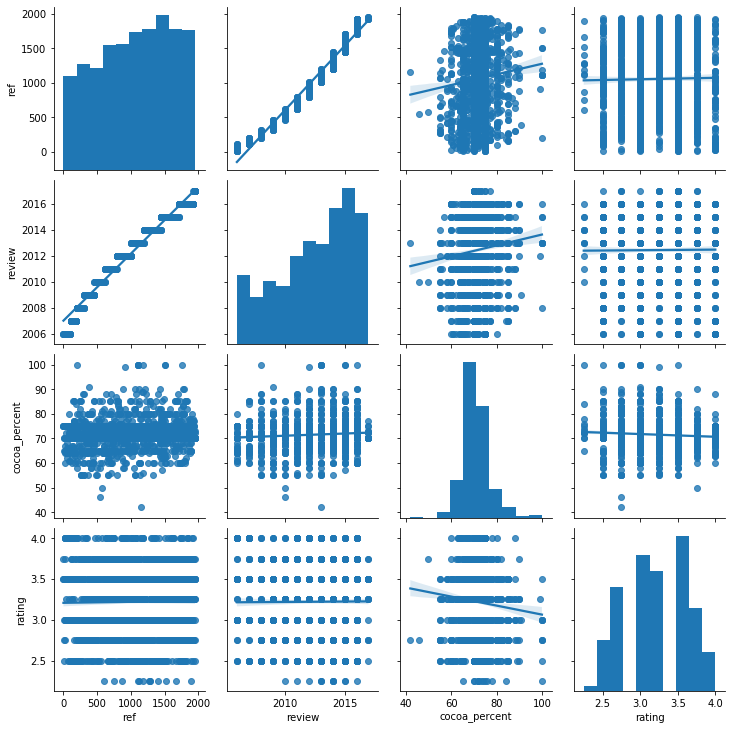

In [107]:
# Корреляционный анализ
# Выясним, какие столбцы коррелируют с оценкой шоколадных батончиков. 
# Это поможет понять, какие параметры стоит оставить для модели, а какие — исключить. 

# Корреляции рассмотрим только для числовых столбцов.

# Для быстрого построения графиков зависимости переменных 
# можно воспользоваться функцией pairplot из модуля seaborn:

sns.pairplot(cacao, kind = 'reg')

In [108]:
# Используем для наглядности матрицу корреляций:
cacao.corr()
# Так как переменные review_date и ref скоррелированы почти полностью, 
# одну переменную можно исключить. Пусть это будет переменная REF.

# Останутся две слабоскоррелированные с рейтингом переменные: cocoa_percent и review_date.

# Интересно, что положительная корреляция параметра review_date и rating может говорить как о том, 
# что со временем батончики действительно становятся лучше, так и о том, 
# что рейтинги просто завышаются.

,ref,review,cocoa_percent,rating
ref,1.000000,0.984913,0.083765,0.016189
review,0.984913,1.000000,0.086523,0.006703
cocoa_percent,0.083765,0.086523,1.000000,-0.078156
rating,0.016189,0.006703,-0.078156,1.000000


In [111]:
# Очевидно, что для номинативных переменных использовать корреляционный анализ не получится. 
# Однако можно посмотреть, различаются ли распределения рейтинга в зависимости от значения этих 
# переменных. Это можно сделать, например, с помощью box-plot или KDE-plot 
# (график показывает плотность распределения переменных).

# Так как уникальных значений в столбцах достаточно много, будем брать в рассмотрение по, 
# например, 10 самых частотных.

def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x=column, y='rating', 
                data=cacao.loc[cacao.loc[:, column].isin(cacao.loc[:, column].value_counts().index[:10])],
               ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

In [1]:
for col in ['company', 'specific_origin', 'company_location', 'bean_type', 'broad_origin']:
    
    get_boxplot(col)
    
# По графикам похоже, что все параметры, кроме broad_origin, могут влиять на оценку батончика. 
# Однако графики являются лишь вспомогательным инструментом, 
# настоящую значимость различий может помочь распознать статистика. 
# Проверим, есть ли статистическая разница в распределении оценок по номинативным признакам, 
# с помощью теста Стьюдента. Проверим нулевую гипотезу о том, 
# что распределения оценок батончиков по различным параметрам неразличимы:

company
specific_origin
company_location
bean_type
broad_origin


In [144]:
def get_stat_dif(column):
    cols = cacao.loc[:, column].value_counts().index[:10]
    
    combinations_all = list(combinations(cols, 2))
    
    for comb in combinations_all:
        if ttest_ind(cacao.loc[cacao.loc[:, column] == comb[0], 'rating'], 
                        cacao.loc[cacao.loc[:, column] == comb[1], 'rating']).pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

In [146]:
for col in ['company', 'specific_origin', 'company_location', 'bean_type', 'broad_origin']:
    get_stat_dif(col)


Найдены статистически значимые различия для колонки company
Найдены статистически значимые различия для колонки specific_origin
Найдены статистически значимые различия для колонки company_location


In [148]:
cacao.head(1)

,company,specific_origin,ref,review,cocoa_percent,company_location,rating,bean_type,broad_origin
1,A. Morin,Kpime,1676,2015,70.0,France,2.75,None,Togo


In [149]:
cacao_for_model = cacao.loc[:, ['company', 'specific_origin', 'company_location', 'review', 'cocoa_percent']]
cacao_for_model.head()

,company,specific_origin,company_location,review,cocoa_percent
1,A. Morin,Kpime,France,2015,70.0
3,A. Morin,Akata,France,2015,70.0
4,A. Morin,Quilla,France,2015,70.0
5,A. Morin,Carenero,France,2014,70.0
6,A. Morin,Cuba,France,2014,70.0


In [ ]:
conda install -c conda-forge jupyter_contrib_nbextensions

In [ ]:
pip install autopep8